# **3. Symmetric Matrix Decomposition**
- Create a covariance matrix from samples of the MNIST dataset $(\(C = X^T X\))$.
- Verify if the matrix $\(C\)$ is symmetric.
- Calculate the eigenvalues and eigenvectors of matrix $\(C\)$ and interpret their significance in relation to the data.

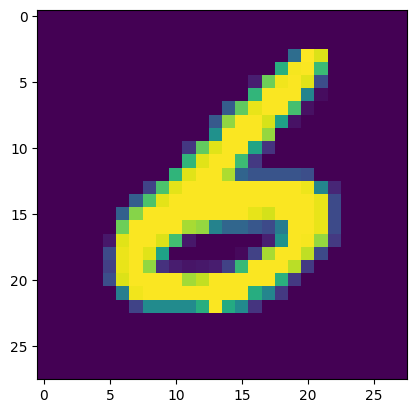

In [2]:
# Downloading MNIST dataset pytorch
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

MNIST_path = '../chapter2 - Linear Algebra/MNIST_data'

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(MNIST_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

# get some random training images and their labels, when we use next dataiter it returns the next batch ( we defined as 64 imagens )
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = images[0].numpy()
img = np.transpose(img, (1, 2, 0))
plt.imshow(img)
plt.show()

In [3]:
# create a covariance matrix from samples of the MNIST dataset

X = images.view(images.shape[0], -1).numpy()

C = np.matmul(X.T, X)

# verify if the matrix C is symmetric
if np.allclose(C, C.T):
    print("The matrix C is symmetric.")
else:
    print("The matrix C is not symmetric.")

The matrix C is symmetric.



# Calculate the eigenvalues and eigenvectors of matrix C and interpret their significance in relation to the data

In [4]:
# Calculate the eigenvalues and eigenvectors of matrix C
eigenvalues, eigenvectors = np.linalg.eig(C)

# Interpret the eigenvalues and eigenvectors in relation to the data
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

Eigenvalues: [ 1.61891318e+04+0.00000000e+00j  4.69156250e+03+0.00000000e+00j
  2.79780591e+03+0.00000000e+00j  2.68873901e+03+0.00000000e+00j
  2.14537109e+03+0.00000000e+00j  1.69730713e+03+0.00000000e+00j
  1.43924329e+03+0.00000000e+00j  1.35450122e+03+0.00000000e+00j
  1.20984705e+03+0.00000000e+00j  1.07307019e+03+0.00000000e+00j
  1.01682178e+03+0.00000000e+00j  9.35663879e+02+0.00000000e+00j
  8.58924866e+02+0.00000000e+00j  8.38552490e+02+0.00000000e+00j
  7.53368042e+02+0.00000000e+00j  6.56531433e+02+0.00000000e+00j
  5.91483032e+02+0.00000000e+00j  5.52216003e+02+0.00000000e+00j
  5.10224609e+02+0.00000000e+00j  4.74469910e+02+0.00000000e+00j
  4.57754791e+02+0.00000000e+00j  4.34977997e+02+0.00000000e+00j
  4.15189209e+02+0.00000000e+00j  4.05309052e+02+0.00000000e+00j
  3.88375916e+02+0.00000000e+00j  3.76296326e+02+0.00000000e+00j
  3.45637024e+02+0.00000000e+00j  2.99073151e+02+0.00000000e+00j
  2.87285370e+02+0.00000000e+00j  2.80711029e+02+0.00000000e+00j
  2.60978027

## **Summary**
- **Orthogonality**: The eigenvectors of the covariance matrix are orthogonal, forming an orthonormal basis in $\(\mathbb{R}^{784}\)$.
- **Space Coverage**: The $\(784\)$ eigenvectors span the entire $\(\mathbb{R}^{784}\)$ space, and any vector can be represented as a linear combination of them.
- **Largest Eigenvalue**: The eigenvector associated with the largest eigenvalue indicates the direction of the greatest correlation/variance in the data and is crucial for understanding the main features of the dataset.


# **4. Simplified PCA Data Reconstruction**
- Use the eigenvalues and eigenvectors calculated earlier.
- Reduce the dimensionality of the flattened vector of an MNIST image to its top two principal components.
- Reconstruct the original image using only these two components and visualize the impact.

In [14]:
# get the top two principal components
eigenvalues, eigenvectors = np.linalg.eig(C)

# sort the eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]

# use the sorted indexes to reorder the eigenvalues and eigenvectors
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# convert the eigenvectors and eigenvalues from numpy.complex64 to numpy.float32
eigenvalues = eigenvalues.astype(np.float32)
eigenvectors = eigenvectors.astype(np.float32)

V = eigenvectors[:, :2] # -> change how much componentes you choose to get better reconstructions

X = images.view(images.shape[0], -1).numpy()

X_reduced = np.matmul(X, V)

X_reduced

/var/folders/kx/_rp_q3l95vv5m3m9dth8j6400000gn/T/ipykernel_13553/1978579237.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvalues = eigenvalues.astype(np.float32)
/var/folders/kx/_rp_q3l95vv5m3m9dth8j6400000gn/T/ipykernel_13553/1978579237.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  eigenvectors = eigenvectors.astype(np.float32)


array([[-23.55226   ,  -0.11260724],
       [-11.784346  ,  -4.380748  ],
       [ -6.129761  ,  -4.7555923 ],
       [-24.888235  ,   5.588726  ],
       [ -7.670987  ,  -0.44005233],
       [-23.427685  ,  11.021039  ],
       [-17.083637  ,  -5.944336  ],
       [-14.233388  ,   1.9629377 ],
       [-23.691883  ,  19.375416  ],
       [-14.123848  ,  -3.5006325 ],
       [-17.781342  ,  17.224277  ],
       [-17.712822  ,   2.4552312 ],
       [-13.87281   ,  -8.4974785 ],
       [ -8.741823  ,  -5.670726  ],
       [-26.632103  ,   2.0842023 ],
       [-12.978094  ,  -4.606416  ],
       [-19.677612  ,  -7.7439213 ],
       [ -7.518017  ,  -3.8013468 ],
       [ -9.40103   ,  -8.844336  ],
       [-14.853835  ,  -9.498276  ],
       [ -7.190926  ,  -7.9302473 ],
       [-23.542168  , -10.430864  ],
       [-14.3617    ,  -5.3858223 ],
       [-19.212824  ,  -4.478584  ],
       [-18.502777  ,  17.911892  ],
       [-12.273597  ,  -5.4574933 ],
       [-11.997358  ,   9.348708  ],
 

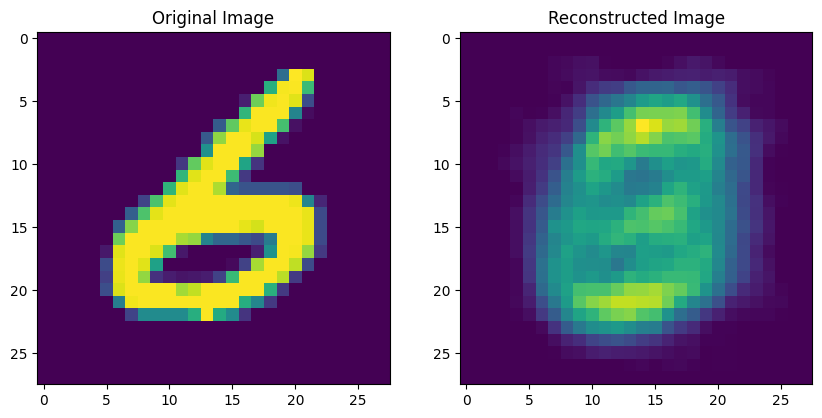

In [15]:
X_reconstructed = np.matmul(X_reduced, V.T)

# reshape the image back to a 28x28 matrix
img = np.reshape(X_reconstructed[0], (28, 28))

original_img = np.reshape(X[0], (28, 28))

# plot the original and reconstructed images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(original_img)
ax[0].set_title("Original Image")
ax[1].imshow(img)
ax[1].set_title("Reconstructed Image")
plt.show()

Visually we see that we lose some of the original information when we reduce the dimensionality of the data. OBS: test 